<a href="https://colab.research.google.com/github/abhimanyubhowmik/ML_Fundamentals/blob/main/Matrix_Operations_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Eigendecomposition

The **eigendecomposition** of some matrix $A$ is 

$A = V \Lambda V^{-1}$

Where: 

* As in examples above, $V$ is the concatenation of all the eigenvectors of $A$
* $\Lambda$ (upper-case $\lambda$) is the diagonal matrix diag($\lambda$). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix $A$.

In [4]:
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
A = np.array([[4, 2], [-5, -3]]) 
A

array([[ 4,  2],
       [-5, -3]])

In [ ]:
lambdas, V = np.linalg.eig(A)

In [ ]:
lambdas

array([ 2., -1.])

In [ ]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [ ]:
V_inv = np.linalg.inv(V)
V_inv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [ ]:
diag = np.diag(lambdas)

In [ ]:
np.dot(V,np.dot(diag,V_inv))

array([[ 4.,  2.],
       [-5., -3.]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers. 

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If $A$ is a real symmetric matrix then:

$A = Q \Lambda Q^T$

where $Q$ is analogous to $V$ from the previous equation except that it's special because it's an orthogonal matrix. 

In [ ]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [ ]:
lambdas, Q = np.linalg.eig(A)

In [ ]:
diag = np.diag(lambdas)
diag

array([[3., 0.],
       [0., 1.]])

In [ ]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
np.dot(Q,np.dot(diag,Q.T))

array([[2., 1.],
       [1., 2.]])

### Singular Value Decomposition (SVD)

A Singular Value Decomposition of a matrix A is given by:

$A = U \Sigma V^T$

Where: 

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $\Sigma$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

In [ ]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [ ]:
U, Sigma , VT = np.linalg.svd(A)

In [ ]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [ ]:
Sigma

array([8.66918448, 4.10429538])

In [ ]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [ ]:
Sigma = np.concatenate((np.diag(Sigma),np.array([[0,0]])),axis= 0)

In [ ]:
np.dot(U,np.dot(Sigma,VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

### Image Compression by SVD

In [5]:
from PIL import Image

In [6]:
! wget https://cdn.wallpapersafari.com/2/37/GCwWBV.jpg

--2022-02-14 14:49:02--  https://cdn.wallpapersafari.com/2/37/GCwWBV.jpg
Resolving cdn.wallpapersafari.com (cdn.wallpapersafari.com)... 172.67.75.34, 104.26.9.96, 104.26.8.96, ...
Connecting to cdn.wallpapersafari.com (cdn.wallpapersafari.com)|172.67.75.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 290972 (284K) [image/jpeg]
Saving to: ‘GCwWBV.jpg.1’

GCwWBV.jpg.1        100%[===================>] 284.15K  --.-KB/s    in 0.02s   

2022-02-14 14:49:03 (12.1 MB/s) - ‘GCwWBV.jpg.1’ saved [290972/290972]



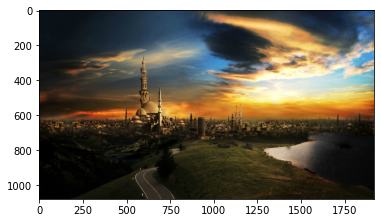

In [7]:
img = Image.open('GCwWBV.jpg')
_ = plt.imshow(img)

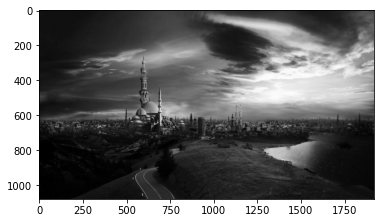

In [8]:
#Gray Scaling of image
img_gray = img.convert('LA')
_ = plt.imshow(img_gray)

In [9]:
img_mat = np.array(list(img_gray.getdata(band=0)), float)
img_mat.shape

(2073600,)

In [10]:
img_mat.shape = (img_gray.size[1], img_gray.size[0])
img_mat

array([[16., 16., 16., ..., 62., 62., 61.],
       [16., 16., 16., ..., 62., 62., 62.],
       [17., 17., 17., ..., 63., 62., 62.],
       ...,
       [ 1.,  1.,  1., ..., 11., 11., 11.],
       [ 1.,  1.,  1., ..., 14., 13., 12.],
       [ 1.,  1.,  1., ..., 17., 15., 14.]])

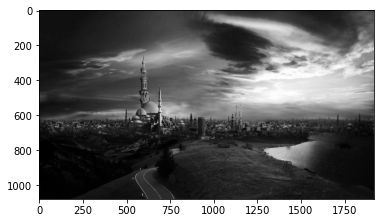

In [11]:
imgmat = np.matrix(img_mat)
_ = plt.imshow(imgmat, cmap='gray')

In [12]:
U, sigma, VT = np.linalg.svd(imgmat)

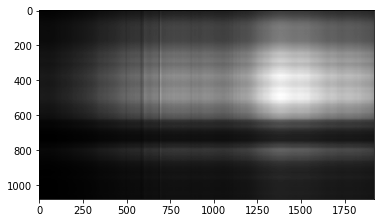

In [13]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(VT[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

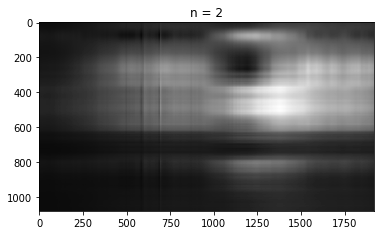

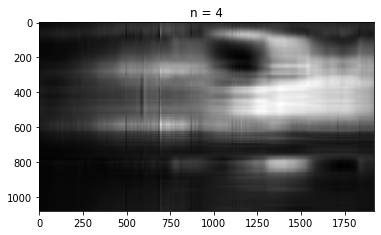

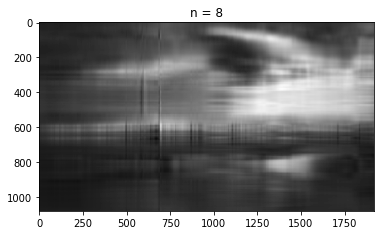

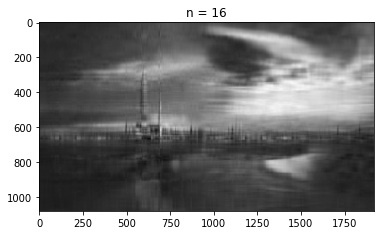

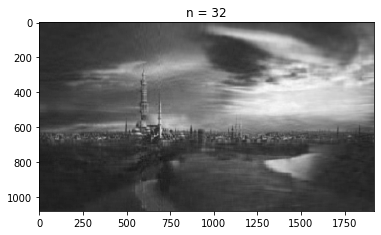

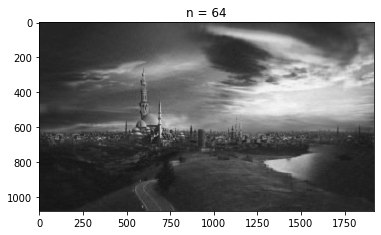

In [14]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [15]:
img_mat.shape

(1080, 1920)

In [16]:
#Size of image
1080*1920

2073600

In [18]:
print(U.shape, VT.shape, np.diag(sigma).shape)

(1080, 1080) (1920, 1920) (1080, 1080)


In [22]:
np.matrix(U[:, :32]).shape

(1080, 32)

In [20]:
np.diag(sigma[:1])

array([[135199.60902252]])

In [25]:
np.diag(sigma)

array([[1.35199609e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.56678068e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.06947416e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.35146391e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.16072163e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.11776029e+00]])

In [26]:
#Size of 32 singular vector
32*1080 + 32 + 32*1920

96032

In [27]:
#Reduction in size for 32 singular vector 
96032/2073600*100

4.631172839506173